In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os

directory_path = r'C:\Users\meh\Desktop\data-ai'
classes = {'not_target':0, 'target':1}


In [4]:
import sys
sys.path.append(r'C:\Users\meh\AppData\Local\Programs\Python\Python37\Lib\site-packages\cv2')

import cv2
x=[]
y=[]

for cls in classes: 
  pth=r'Desktop/data-ai/Training/'+cls
  for j in os.listdir(pth):
    img=cv2.imread(pth+'/'+j,0)
    img=cv2.resize(img,(200,200))
    x.append(img)
    y.append(classes[cls])


In [5]:
x=np.array(x)
y=np.array(y)

x_updated=x.reshape(len(x),-1)

In [6]:
np.unique(y)

array([0, 1])

In [7]:
pd.Series(y).value_counts()

1    15
0    10
dtype: int64

In [8]:
x.shape,x_updated.shape

((25, 200, 200), (25, 40000))

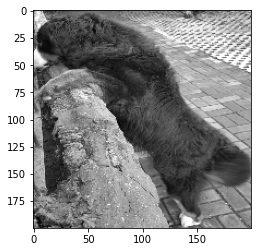

In [9]:
plt.imshow(x[0],cmap='gray')

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x_updated,y,random_state=10,test_size=0.20)

In [11]:
xtrain.shape,xtest.shape

((20, 40000), (5, 40000))

In [22]:
xtrain=xtrain/xtrain.max()
xtest=xtest/xtest.max()

In [14]:
from sklearn.svm import SVC

sv= SVC()
sv.fit(xtrain,ytrain)

SVC()

In [15]:
print("Training Score: ",sv.score(xtrain,ytrain))
print("Testing Score: ",sv.score(xtest,ytest))

Training Score:  0.95
Testing Score:  0.8


In [16]:
pred=sv.predict(xtest)

In [17]:
misclassified=np.where(ytest!=pred)
misclassified

(array([3], dtype=int64),)

In [18]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[4],ytest[4])

Total Misclassified Samples:  1
1 1


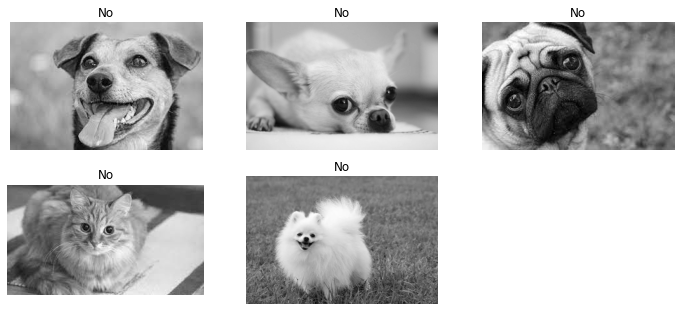

In [19]:
#testing 

des={0:'Yes',1:'No'}

plt.figure(figsize=(12,8))
p=os.listdir('Desktop/data-ai/Testing')
c=1
for i in os.listdir('Desktop/data-ai/Testing/not_target')[:5]:
    plt.subplot(3,3,c)
    img=cv2.imread('Desktop/data-ai/Testing/not_target/'+i,0)
    img1=cv2.resize(img, (200,200))
    img1=img.reshape(1,-1)[:,:40000] / 255
    p=sv.predict(img1)
    plt.title(des[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

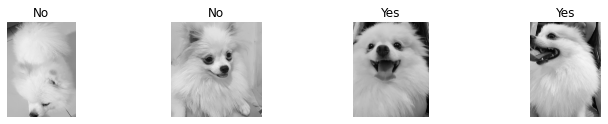

In [20]:
plt.figure(figsize=(12,8))
p=os.listdir('Desktop/data-ai/Testing')
c=1
for i in os.listdir('Desktop/data-ai/Testing/target')[:4]:
    plt.subplot(4,4,c)
    img=cv2.imread('Desktop/data-ai/Testing/target/'+i,0)
    img1=cv2.resize(img, (200,200))
    img1=img.reshape(1,-1)[:,:40000]/253
    p=sv.predict(img1)
    plt.title(des[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1